<a href="https://colab.research.google.com/github/shivhub09/LSTM_STOCK_PRICE_PREDICTION/blob/main/STOCK_PRICE_PREDICTION_BHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
df = yf.download("BHEL.NS", )

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.to_csv('BHEL.csv')

In [ ]:
import pandas as pd

In [ ]:
end = datetime.now()
start = datetime(end.year - 5, end.month - 1, end.day-3)

In [ ]:
df = yf.download("BHEL.NS" , start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-23,71.250000,71.599998,69.050003,69.349998,66.177368,5371992
2019-01-24,69.250000,70.099998,68.650002,69.050003,65.891106,6289323
2019-01-25,69.150002,69.500000,66.050003,66.400002,63.362331,7134722
2019-01-28,66.500000,66.750000,63.450001,63.750000,60.833565,8737901
2019-01-29,63.200001,65.349998,63.200001,64.400002,61.453827,8758306


In [ ]:
df.shape

(1258, 6)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,226.899994,233.800003,225.949997,230.899994,230.899994,22994469
2024-02-21,232.000000,232.350006,220.050003,221.899994,221.899994,22193528
2024-02-22,224.000000,229.399994,220.949997,228.500000,228.500000,25023398
2024-02-23,229.449997,233.750000,228.500000,229.600006,229.600006,21463226
2024-02-26,229.800003,232.149994,226.250000,228.050003,228.050003,14280717


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        69.349998
1        69.050003
2        66.400002
3        63.750000
4        64.400002
           ...    
1253    230.899994
1254    221.899994
1255    228.500000
1256    229.600006
1257    228.050003
Name: Close, Length: 1258, dtype: float64

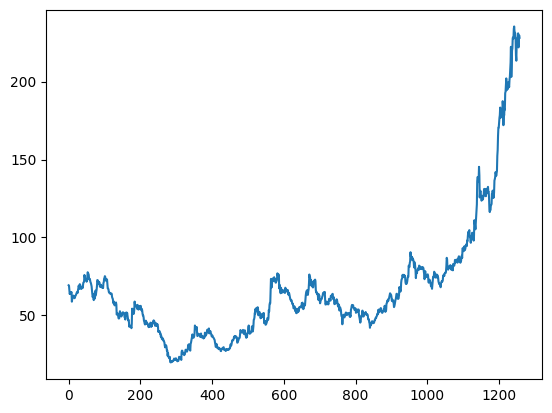

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0        69.349998
1        69.050003
2        66.400002
3        63.750000
4        64.400002
           ...    
1253    230.899994
1254    221.899994
1255    228.500000
1256    229.600006
1257    228.050003
Name: Close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.22975167]
 [0.22835926]
 [0.21605941]
 ...
 [0.96843814]
 [0.97354376]
 [0.9663495 ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.22975167],
       [0.22835926],
       [0.21605941],
       [0.20375957],
       [0.20677652],
       [0.20445579],
       [0.20816893],
       [0.20654443],
       [0.20932929],
       [0.18101647],
       [0.19006729],
       [0.19656533],
       [0.1967974 ],
       [0.19911812],
       [0.19470874],
       [0.19702947],
       [0.19122766],
       [0.19169181],
       [0.1958691 ],
       [0.19911812],
       [0.20004641],
       [0.20329543],
       [0.20654443],
       [0.20886515],
       [0.20932929],
       [0.20700857],
       [0.21489905],
       [0.22023672],
       [0.22859131],
       [0.22394986],
       [0.21930841],
       [0.23300071],
       [0.23184034],
       [0.22348572],
       [0.22000464],
       [0.22255745],
       [0.2195405 ],
       [0.22394986],
       [0.22603853],
       [0.22139709],
       [0.22859131],
       [0.23764215],
       [0.23880252],
       [0.23996288],
       [0.26038522],
       [0.25458341],
       [0.25063819],
       [0.247

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 335ms/step - loss: 0.0058 - val_loss: 0.0767
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0021 - val_loss: 0.0228
Epoch 3/100
12/12 [==============================] - 2s 213ms/step - loss: 9.0129e-04 - val_loss: 0.0095
Epoch 4/100
12/12 [==============================] - 3s 255ms/step - loss: 5.8563e-04 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 3s 254ms/step - loss: 5.5085e-04 - val_loss: 0.0055
Epoch 6/100
12/12 [==============================] - 2s 201ms/step - loss: 5.0666e-04 - val_loss: 0.0071
Epoch 7/100
12/12 [==============================] - 2s 195ms/step - loss: 4.8526e-04 - val_loss: 0.0058
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 4.7457e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 3s 220ms/step - loss: 4.1480e-04 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 3s 240ms

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 43ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

50.44042296266806

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

115.898321579957

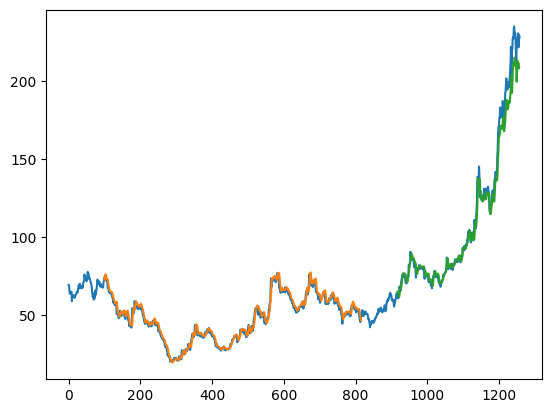

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
test_data.shape

(441, 1)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

100

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8912578]
101
1 day input [0.51659314 0.49988397 0.49918775 0.50614988 0.49477835 0.51682523
 0.51520076 0.51427242 0.50359714 0.51659314 0.52262704 0.50754233
 0.50754233 0.48897654 0.45439776 0.44766768 0.4548619  0.45393363
 0.46809002 0.46878625 0.47203528 0.50220469 0.5047575  0.51148759
 0.50638197 0.48944071 0.49176144 0.50684614 0.54142492 0.54560219
 0.551404   0.56625669 0.56207935 0.55581343 0.56300762 0.57043397
 0.61452772 0.63216524 0.67393827 0.69900206 0.69923415 0.71571131
 0.72801111 0.73613365 0.7586447  0.72801111 0.74170337 0.73358084
 0.74170337 0.74982591 0.75052217 0.77767459 0.76537479 0.70619632
 0.74541654 0.73543746 0.75353908 0.75237872 0.80181018 0.80621954
 0.82757016 0.84543976 0.81016473 0.81318172 0.8166628  0.81364582
 0.81573453 0.83453233 0.82571361 0.81967971 0.84195868 0.85008121
 0.86911118 0.89255043 0.93942909 0.84984913 0.88210718 0.92852166
 0.93501973 0.96588533 0.96727778 0.96379669 0.99303783 1.
 0.98375493 0.98259457 0.97911348 0.964028

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

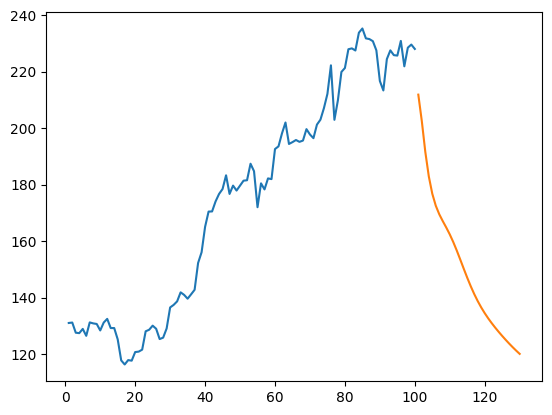

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

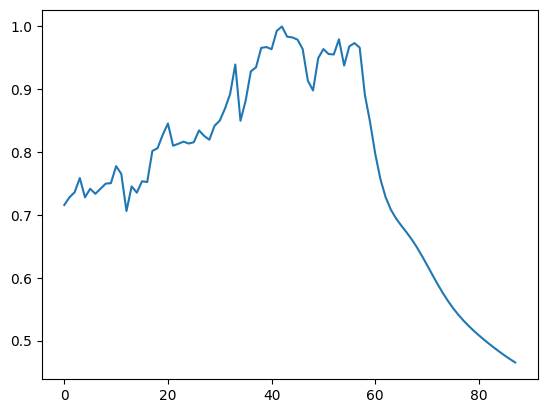

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

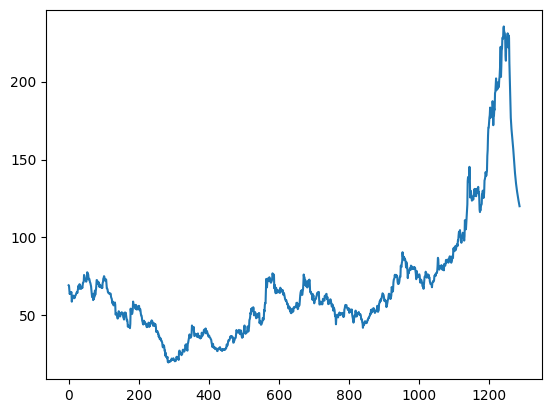

In [ ]:
plt.plot(df3)

In [ ]:
ytest.shape

(340,)

In [ ]:
ytest[0]

0.19076351762393215

In [ ]:
test_predict.shape

(340, 1)

In [ ]:
test_predict.shape

(340, 1)

In [ ]:
ytest[-1]

0.9735437601411168

In [ ]:
original_value = scaler.inverse_transform([[ytest[339]]])[0, 0]

In [ ]:
original_value

228.5

In [ ]:
len(df3)

1288

In [ ]:
len(df1)

1258

In [ ]:
df3[1258]

[211.87150062193575]